###CONFIGURAÇÕES INICIAIS

In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=425c5a1499e3e939890c30dd448b4a2f71ab67e6112618d81f32098e748d6b04
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import pandas as pd
import wget
import matplotlib.pyplot as plt
from zipfile import ZipFile
from google.colab.data_table import DataTable

In [59]:
#Acessando a base de dados e criando arquivos históricos:
url_base = 'http://dados.cvm.gov.br/dados/CIA_ABERTA/DOC/DFP/DADOS/'

In [60]:
#Lista com o nome de todos os arquivos:
arquivos_zip=[]
for ano in range(2010,2023):
  arquivos_zip.append(f'dfp_cia_aberta_{ano}.zip')
arquivos_zip

['dfp_cia_aberta_2010.zip',
 'dfp_cia_aberta_2011.zip',
 'dfp_cia_aberta_2012.zip',
 'dfp_cia_aberta_2013.zip',
 'dfp_cia_aberta_2014.zip',
 'dfp_cia_aberta_2015.zip',
 'dfp_cia_aberta_2016.zip',
 'dfp_cia_aberta_2017.zip',
 'dfp_cia_aberta_2018.zip',
 'dfp_cia_aberta_2019.zip',
 'dfp_cia_aberta_2020.zip',
 'dfp_cia_aberta_2021.zip',
 'dfp_cia_aberta_2022.zip']

In [ ]:
#Download de todos os arquivos:
for arq in arquivos_zip:
  wget.download(url_base+arq)

In [ ]:
#Extraindo os zips:
for arq in arquivos_zip:
  ZipFile(arq, 'r').extractall('CVM')

In [ ]:
#Criando arquivos históricos:
!mkdir DADOS

In [ ]:
nomes = ['BPA_con', 'BPA_ind', 'BPP_con', 'BPP_ind', 'DFC_MD_con', 'DFC_MD_ind', 'DFC_MI_con', 'DFC_MI_ind', 'DMPL_con', 'DMPL_ind', 'DRE_con', 'DRE_ind', 'DVA_con', 'DVA_ind']
for nome in nomes:
  arquivo = pd.DataFrame()
  for ano in range(2010,2023):
    arquivo = pd.concat([arquivo, pd.read_csv(f'CVM/dfp_cia_aberta_{nome}_{ano}.csv', sep = ';', decimal = ',', encoding = 'ISO-8859-1')])
  arquivo.to_csv(f'/content/CVM/DADOS/dfp_cia_aberta_{nome}_2010-2022.csv', index = False)

In [61]:
dre = pd.read_csv('/content/CVM/DADOS/dfp_cia_aberta_DRE_con_2010-2022.csv')
dre = dre[dre['ORDEM_EXERC']== "ÚLTIMO"]
dre.head(3)

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
1,00.000.000/0001-91,2010-12-31,3,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2010-01-01,2010-12-31,3.01,Receitas da Intermediação Financeira,85143206.0,S
3,00.000.000/0001-91,2010-12-31,3,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2010-01-01,2010-12-31,3.01.01,Receita de Juros,85143206.0,S
5,00.000.000/0001-91,2010-12-31,3,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2010-01-01,2010-12-31,3.02,Despesas da Intermediação Financeira,-50775741.0,S


In [62]:
empresas = dre[['DENOM_CIA', 'CD_CVM']].drop_duplicates().set_index('CD_CVM')
DataTable(empresas)

,DENOM_CIA
CD_CVM,
1023,BCO BRASIL S.A.
14206,BRB BCO DE BRASILIA S.A.
2437,CENTRAIS ELET BRAS S.A. - ELETROBRAS
14451,CIA ENERGETICA DE BRASILIA
14540,VBC ENERGIA SA
...,...
57886,"INTER & CO, INC."
26549,CLARANET TECHNOLOGY S.A.
26786,SENIOR SISTEMAS S.A.


In [63]:
empresa = dre[dre['CD_CVM']==22470]
empresa.head(3)

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
17032,47.960.950/0001-21,2010-12-31,1,MAGAZINE LUIZA S.A.,22470,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2010-01-01,2010-12-31,3.01,Receita de Venda de Bens e/ou Serviços,4808024.0,S
17034,47.960.950/0001-21,2010-12-31,1,MAGAZINE LUIZA S.A.,22470,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2010-01-01,2010-12-31,3.02,Custo dos Bens e/ou Serviços Vendidos,-3166261.0,S
17036,47.960.950/0001-21,2010-12-31,1,MAGAZINE LUIZA S.A.,22470,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2010-01-01,2010-12-31,3.03,Resultado Bruto,1641763.0,S


In [64]:
#lista com o nome de todas as contas do DRE:
DataTable(empresa[['CD_CONTA', 'DS_CONTA']].drop_duplicates().set_index('CD_CONTA'))

,DS_CONTA
CD_CONTA,
3.01,Receita de Venda de Bens e/ou Serviços
3.02,Custo dos Bens e/ou Serviços Vendidos
3.03,Resultado Bruto
3.04,Despesas/Receitas Operacionais
3.04.01,Despesas com Vendas
3.04.02,Despesas Gerais e Administrativas
3.04.02.01,Gerais e Adminsitrativas
3.04.02.02,Depreciação
3.04.03,Perdas pela Não Recuperabilidade de Ativos


In [65]:
conta = empresa[empresa['CD_CONTA'] == '3.99.01.01']
conta.index = pd.to_datetime(conta['DT_REFER'])
conta.head()

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
DT_REFER,,,,,,,,,,,,,,,
2010-12-31,47.960.950/0001-21,2010-12-31,1,MAGAZINE LUIZA S.A.,22470,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2010-01-01,2010-12-31,3.99.01.01,ON,0.45889,N
2011-12-31,47.960.950/0001-21,2011-12-31,4,MAGAZINE LUIZA S.A.,22470,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2011-01-01,2011-12-31,3.99.01.01,ON,0.06687,N
2012-12-31,47.960.950/0001-21,2012-12-31,1,MAGAZINE LUIZA S.A.,22470,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2012-01-01,2012-12-31,3.99.01.01,ON,0.03617,N
2013-12-31,47.960.950/0001-21,2013-12-31,1,MAGAZINE LUIZA S.A.,22470,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2013-01-01,2013-12-31,3.99.01.01,ON,0.61000,N
2014-12-31,47.960.950/0001-21,2014-12-31,1,MAGAZINE LUIZA S.A.,22470,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2014-01-01,2014-12-31,3.99.01.01,ON,0.70000,N


In [66]:
#Calculando o P/E (P/L):
!pip install yfinance
import yfinance as yf

In [67]:
prices = yf.download('MGLU3.SA', start = '2010-01-01')['Adj Close']
prices.head()

[*********************100%***********************]  1 of 1 completed


Date
2011-05-02    0.463173
2011-05-03    0.458950
2011-05-04    0.464018
2011-05-05    0.461202
2011-05-06    0.457824
Name: Adj Close, dtype: float64

In [ ]:
indicadores = prices.join(conta['VL_CONTA'], how='outer')

In [71]:
#mudar nome da coluna:
indicadores.rename({'VL_CONTA':'LPA'}, axis = 1, inplace = True)
indicadores.head()

,Adj Close,LPA,P/L AJUSTADO
2011-05-02,0.463173,0.45889,1.009333
2011-05-03,0.458950,0.45889,1.000130
2011-05-04,0.464018,0.45889,1.011175
2011-05-05,0.461202,0.45889,1.005039
2011-05-06,0.457824,0.45889,0.997676


In [72]:
indicadores.fillna(method='ffill', inplace = True)
indicadores.dropna(inplace=True)
indicadores

,Adj Close,LPA,P/L AJUSTADO
2011-05-02,0.463173,0.45889,1.009333
2011-05-03,0.458950,0.45889,1.000130
2011-05-04,0.464018,0.45889,1.011175
2011-05-05,0.461202,0.45889,1.005039
2011-05-06,0.457824,0.45889,0.997676
...,...,...,...
2022-05-13,4.380000,0.08900,49.213484
2022-05-16,4.380000,0.08900,49.213484
2022-05-17,3.940000,0.08900,44.269664
2022-05-18,3.720000,0.08900,41.797753


Text(0, 0.5, 'P/L')

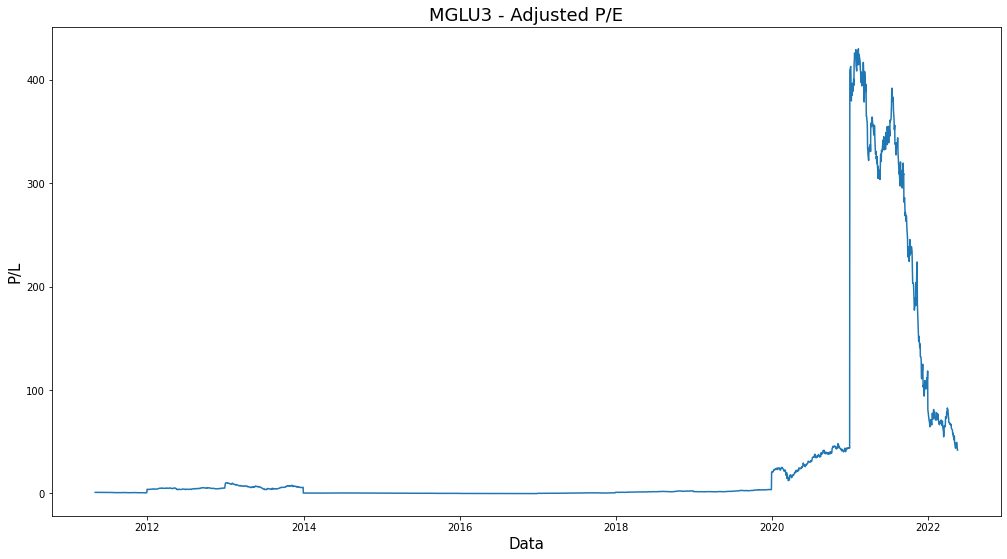

In [73]:
#Calculando P/L e plotando:
indicadores['P/L AJUSTADO'] = indicadores['Adj Close'] / indicadores['LPA']
plt.figure(figsize=(17,9),facecolor=('white'))
plt.plot(indicadores['P/L AJUSTADO'])
plt.title('MGLU3 - Adjusted P/E', fontsize = 18)
plt.xlabel('Data', fontsize = 15)
plt.ylabel('P/L', fontsize = 15)